
# CS2311-Data Structures and Algorithms in Python
## Homework 7A P
## Due Date: See BlackBoard

## Student Name: Laura Moses

**SUBMISSION GUIDELINES**

1. First design, develop and test your code in a Jupyter notebook or other development environment
   - You can expirement and try different things in this notebook
2. Then copy your final code and markdown cells into the Jupyter Notebook file (.ipynb) provided for the assignment and submit to Blackboard
   - **Your submission file should be named HW7AFinal.ipynb**
   - I must be able to open and run your notebook in order to grade it
3. Note that the Jupyter notebook provided for final submission may contain testing code to help you check that your output and expected match.  
   - Follow the instructions in the notebook for copying your code and running the testing code
   - The instructor may run additional tests to check that your code runs correctly
4. If asked, also provide any supporting files or images requested in the assignment
   - If there are multiple files to submit you should zip the files into one folder and submit the folder

**GRADING CRITERIA:**
1. Good documentation/comments and program readability using both markdown cells and code comments
2. Algorithm/pseudo-code is explained in a markdown cell and is efficiently written
3. Program runs correctly for test cases with no syntax errors or logical errors

***The instructor should be able to reproduce your work from your notebook.***

# The SIR Epidemiological Model

The SIR (Susceptible->Infected->Recovered) model is used under situations in which a recovered person receives lifelong immunity from a disease. An example might be varicella (“Chicken Pox”), where infected and subsequently recovered individuals are considered to have lifelong immunity to the disease and will not contract it again.

The simplest form of this model makes the following assumptions:
- Members of the population mix uniformly (the same degree of interaction between all members).
- The probability of infection is independent of age, race and other demographic/differentiating factors.
- There is no inherited immunity.
- The population does not change.
- Individuals can go from Susceptible->Infected->Recovered, and through no other pathways.

# Getting Started

Before creating any plots, we need to understand mathematical framework for the SIR model. Let’s define the following basic notation:

Our total population is N

Now we come to the prediction part with the SIR model, which basic idea is quite simple. There are three groups of people: those that are healthy but susceptible to the disease (S), the infected (I) and the people who have recovered (R):

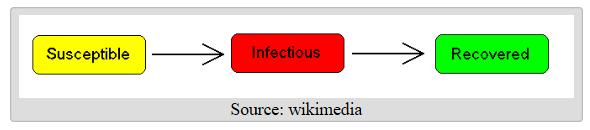

To model the dynamics of the outbreak we need three differential equations, one for the change in each group, where $\beta$ is the parameter that controls the transition between ${S}$ and ${I}$ and $\gamma$  which controls the transition between ${I}$ and ${R}$ :

$$ \frac{dS}{dt} = -\beta\frac{IS}{N}$$

$$ \frac{dI}{dt} = \beta\frac{IS}{N}-\gamma{I}$$

$$ \frac{dR}{dt} = \gamma{I}$$  



The constant $\beta$ represents the contact rate of the disease (an infected individual comes into contact with $\beta{N}$ other individuals per unit time); the value of  must be greater than or equal to zero.

The constant $\gamma$ is the mean recovery rate (which will always be greater than or equal to zero); 

It is important to remember that our total population is described by the sum of susceptible, infected, and recovered individuals:

$$ {N(t)} = {S(t) + I(t) + R(t)}$$

# Building Our Model in Python

First, we’ll import the necessary packages. We’ll be using matplotlib for our plotting package, and the odeint function from scipy to integrate our system of differential equations.

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

The next step will be to set our initial conditions for the model. 

Let’s assume the following scenario: a small contingent of individuals (six people) have returned fully-infected with varicella from a “pox party” in a distant city. All individuals arrive and equally mingle among the USA populus (total population including infected (N) = 300,000,000 people) where no one has ever been exposed to varicella (i.e. no recovered individuals). 

We’ll follow the epidemic for 200 days. This may seem like a long time, but it will also allow us more flexibility when experimenting with values for $\beta$  and $\gamma$.

Given the above scenario, we can assign the necessary values in our Python script:

In [2]:
# total population
N = 300_000_000       # Approx US population
# initial infected
I0 = 6
# initial recovered
R0 = 1          
#initial susceptible
S0 = N - I0 - R0

Now, let’s build our initial conditions vector,  and then use linspace to create an array containing our 200 sampling points (days).

In [3]:
# initial conditions vector
y0 = (S0, I0, R0)
# 200 evenly spaced values (representing days)
t = np.linspace(0, 200, 300)

Arguably, one of the most important parts of our script will be a function containing the differential equations which we will pass to an function we will write for integration of the differential equation.

In [4]:
def SIR(y, t, N, beta, gamma):
    # S, I, R values assigned from vector
    S, I, R = y
    # differential equations
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I # filled in
    dRdt = gamma * I                    # filled in
    return dSdt, dIdt, dRdt

We’ll also need to assign values for $\beta$ and $\gamma$. We’ll start with $\beta = 0.3$ and $\gamma = 0.1$, and plot again with $\beta = 0.2$ and $\gamma = 0.1$.  Lower $\beta$ is equivalent to "social distancing" note how the peak is muted and pushed out in time.

In [5]:
# contact rate
beta1 = 0.3
# mean recovery rate
gamma = 0.1

We can now pass the function to SIR_integ(), a function we have written to integrate the differential equation, and pull the resulting susceptible, infected and recovered values from the transpose of the returned array.

In [6]:
# Complete the code below
# function to integrate SIR model from starting conditions but with ability to change beta over time
def SIR_Integ(y0,t,N,beta_0,gamma):
    
    y = y0
    values = np.zeros((len(t),3)) 
    values[0,0] = y0[0]        # S0
    values[0,1] = y0[1]        # I0            #  <---- completed
    values[0,2] = y0[2]        # R0
    beta = beta_0
    
    for i in range(1,len(t)):
        dSt, dIt, dRt = SIR(y,i,N,beta,gamma)         #  <---- completed
        
        values[i,0] = values[i-1,0] + dSt
        values[i,1] = values[i-1,1] + dIt   #  <---- complete
        values[i,2] = values[i-1,2] + dRt 
        y = (values[i,0],values[i,1],values[i,2])         #  <---- completed
        
    return values

 First scenario:

In [7]:
# Integrate the diff eqs over the time array
#values_1 = odeint(func, y0, t, args=(N, beta1, gamma))
values_1 = SIR_Integ(y0, t, N, beta1, gamma)

# assign S, I, R values from values transpose
S1, I1, R1 = values_1.T

Second scenario:

In [8]:
# Integrate the diff eqs over the time array - Second scenario
beta2 = 0.2
#values_2 = odeint(func, y0, t, args=(N, beta2, gamma))
values_2 = SIR_Integ(y0, t, N, beta2, gamma)

# assign S, I, R values from values transpose
S2, I2, R2 = values_2.T

Finally, we can plot the arrays using matplotlib.  Notice how a lower Beta, equivalent to social distancing, "flattens" the peak of the epidemic.  (See McKinney Chapter 9 on plotting or watch the videos on Blackboard)

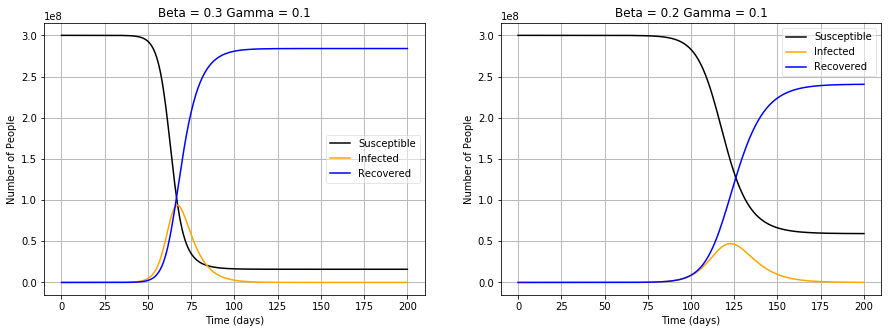

In [9]:
# first figure with higher beta
figure, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
i = 0

# Your plotting code here
ax[i].plot(t, S1, 'black', label = 'Susceptible')
ax[i].plot(t, I1, 'orange', label = 'Infected')
ax[i].plot(t, R1, 'blue', label = 'Recovered')
ax[i].set_xlabel('Time (days)')
ax[i].set_ylabel('Number of People')
ax[i].grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')
ax[i].set_title("Beta = "+format(beta1,'.1f')+" Gamma = "+format(gamma,'.1f'))
legend = ax[i].legend()
legend.get_frame().set_alpha(0.5)

# first figure with lower beta
i = 1
ax[i].plot(t, S2, 'black', label = 'Susceptible')
ax[i].plot(t, I2, 'orange', label = 'Infected')
ax[i].plot(t, R2, 'blue', label = 'Recovered')
ax[i].set_xlabel('Time (days)')
ax[i].set_ylabel('Number of People')
ax[i].grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')
ax[i].set_title("Beta = "+format(beta2,'.1f')+" Gamma = "+format(gamma,'.1f'))
legend = ax[i].legend()
legend.get_frame().set_alpha(0.5)

plt.show()

In [10]:
# summarize some of the statistics
R0 = beta1/gamma   
mort = 0.03    # assumed mortality rate
print("Beta = ",format(beta1,'0.2f'))
print("Gamma = ",format(gamma,'0.2f'))
print("RO = ",format(R0,'0.2f'))
pk = np.argmax(I1)
print("Days to Peak Infection = ",pk)
print("Peak Infected = ", format(I1[pk],",.0f")," or ",format(I1[pk]/N,".2%"),"of population")
print("Peak Recoverd (Immune + Dead) = ", format(R1[-1],",.0f"))
print("Deaths = ",format(R1[-1] * mort,',.0f'),"at mortality rate of ",format(mort,".2%"))   # max deaths with supposed 3% mortality rate

Beta =  0.30
Gamma =  0.10
RO =  3.00
Days to Peak Infection =  100
Peak Infected =  93,689,288  or  31.23% of population
Peak Recoverd (Immune + Dead) =  284,001,245
Deaths =  8,520,037 at mortality rate of  3.00%


# US CoVid19 Cases

Now lets see if we can fit this model to the case data that was being reported in the US early during the pandemic.  We will use the data reported in wikipedia which is updated daily.

Here is the main link summarizing the Covid-19 pandemic.

https://en.wikipedia.org/wiki/2020_coronavirus_outbreak_in_the_United_States

If you go through the web site you will find a web page with case statistics for each of the states in the US.

https://en.wikipedia.org/wiki/Template:2019%E2%80%9320_coronavirus_pandemic_data/United_States_medical_cases

Take a look at the web site and note the table summarizing all the case statitics - we need to extract the 
total cases from this table.  We will see in the second part of the assignment how to "scrape" the information from the web into a pandas data frame.

For the first part of the assignment the data through April 23rd has been scraped for you and saved into an excel file for your use.

We will see what the model was projecting early during the pandemic and get a sense for concern at the time and why the lockdowns were implemented.   

In the second part of the assignment we will look at where we are now after lockdowns, social distancing, and mask wearing, and we will see what the model predicts based on the most recent data as we see an increase again in cases.

In [11]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [12]:
# read the data from excel early in the pandemic (see McKinney Chpt 6 for reading from excel)
xlsx = pd.ExcelFile("Covid_19_USA_Scraped_3_21_2020.xlsx")

In [13]:
type(xlsx)    #  Excel object which contains our excel sheets and data within sheetbb

pandas.io.excel._base.ExcelFile

In [14]:
# get the data from Sheet1 in the excel workbook
dat = pd.read_excel(xlsx,sheet_name="Sheet1")

In [15]:
# Let's take a look at the data frame
dat.tail()

,Date,AK,AZ,CA,CO,HI,ID,MT,NM,NV,...,MD,ME,NH,NJ,NY,PA,RI,VT,New,USA
56,2020-03-17,9.0,71.0,515.0,195.0,20.0,16.0,11.0,23.0,84.0,...,65.0,36.0,34.0,267.0,1375.0,96.0,67.0,23.0,1291,5664
57,2020-03-18,12.0,78.0,641.0,228.0,22.0,19.0,14.0,28.0,110.0,...,93.0,46.0,47.0,429.0,2383.0,133.0,79.0,25.0,2410,8074
58,2020-03-19,15.0,95.0,718.0,289.0,32.0,31.0,18.0,35.0,160.0,...,115.0,56.0,52.0,744.0,4153.0,185.0,90.0,28.0,3948,12022
59,2020-03-20,18.0,114.0,1049.0,375.0,43.0,39.0,23.0,43.0,174.0,...,157.0,60.0,63.0,892.0,7103.0,268.0,100.0,35.0,5417,17439
60,2020-03-21,20.0,155.0,1267.0,487.0,54.0,51.0,29.0,57.0,219.0,...,198.0,77.0,73.0,1329.0,10357.0,371.0,112.0,55.0,6271,23710


In [16]:
# We will work with the USA data for this assignment - let's take a look at that column
dat["USA"].dropna()

0         1
1         1
2         1
3         2
4         3
      ...  
56     5664
57     8074
58    12022
59    17439
60    23710
Name: USA, Length: 61, dtype: int64

In [17]:
# Put the data into a tuple for our models
under_report_factor = 1                  # assume no under reporting of cases
Infected = tuple(dat["USA"].dropna()*under_report_factor)

**Note the exponential nature of the reported case growth rate**

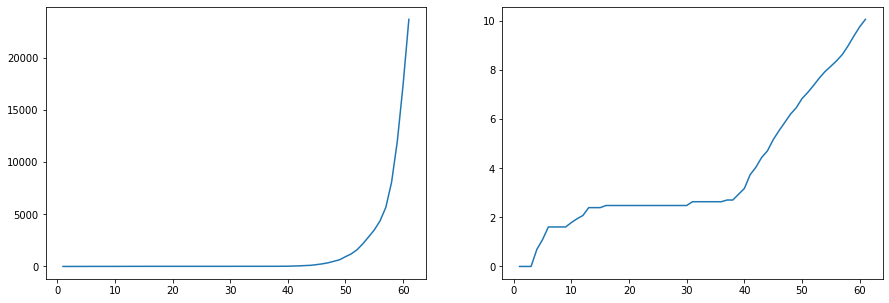

In [18]:
# Plot the wikipedia daily case data 
Day = list(range(1,len(Infected)+1))

# complete the code
figure, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
axes[0].plot(Day,Infected)

# use log scale to show log-linear growth 
axes[1].plot(Day,np.log(Infected))

plt.show()

For the US as a whole from day 40 Covid 19 starts to show exponential growth for the US as a whole. WA, CA, and NY are already showing exponential growth. Lockdowns begin around day 60 and we are on watch to see if we can "bend the curve". Let's see what the model says on the data from day 40 to 60.

In [19]:
# For the US as a whole from day 40 Covid 19 starts to show exponential growth for the US as a whole.  WA, CA, and NY
# are already showing exponential growth.  Lockdowns begin around day 60 and we are on watch to see if we can "bend 
# the curve".  Let's see what the model says on the data from day 40 to 60.
sdate = 40
fdate = 60
print("Day",sdate,"is ",dat["Date"].iloc[sdate],"with infections of",Infected[sdate])
print("Day",fdate,"is ",dat["Date"].iloc[fdate],"with infections of",Infected[fdate])

# keep track of the start date for model
model_date = str(dat["Date"].iloc[sdate]).split(' ')[0] # eliminate the hours minutes seconds

# Apply the SIR model to the early March data
mod_Infected = Infected[sdate:fdate]

Day 40 is  2020-03-01 00:00:00 with infections of 42
Day 60 is  2020-03-21 00:00:00 with infections of 23710


Set up the initial conditions for the model

In [20]:
# total population
N = 300_000_000  
# initial infected
I0 = Infected[sdate]
# initial recovered
R0 = int(I0*0.9)        # Guess that 90 % recovered
#initial unsceptible
S0 = N - I0 - R0

We’ll also need to assign values for $\beta$ and $\gamma$. We’ll optimize the model for the best $\beta$ and $\gamma$.

Now, let’s build our initial conditions vector,  and then use linspace to create an array containing our 200 sampling points (days).

In [21]:
# initial conditions vector
y0 = (S0, I0, R0)
# 200 evenly spaced values (representing days)
t = np.linspace(1, 200, 200)

Here's the SIR differential equation model again

In [22]:
def SIR(y, t, N, beta, gamma):
    # S, I, R values assigned from vector
    S, I, R = y
    # differential equations
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I   # <--- filled in
    dRdt = gamma * I                     # <--- filled in
    return dSdt, dIdt, dRdt

Let's create a residual sum of squares function RSS that minimizes the RSS between the SIR model and the observed data wrt to $\beta$ and $\gamma$.

We will use minimize and least_squares from the scipy.optimize library.

In [23]:
# function to integrate SIR model from starting conditions but with ability to change beta over time
def SIR_Integ(y0,t,N,beta_0,gamma):
    
    y = y0
    values = np.zeros((len(t),3)) 
    values[0,0] = y0[0]     # S0
    values[0,1] = y0[1]     # I0            #  <---- completed
    values[0,2] = y0[2]     # R0
    beta = beta_0
    
    for i in range(1,len(t)):
        dSt, dIt, dRt = SIR(y,i,N,beta,gamma)         #  <---- completed
        
        values[i,0] = values[i-1,0]+dSt
        values[i,1] = values[i-1,1]+dIt   #  <---- completed
        values[i,2] = values[i-1,2]+dRt 
        y = (values[i,0],values[i,1],values[i,2])         #  <---- completed
        
    return values

# Create an RSS (residual sum of squares) function to fit best beta and gamma using the least squares optimizer

In [24]:
import numpy as np
from scipy.optimize import minimize,least_squares

# python optimization function
def RSS(x,y0,t,N,Infected):

    #import pdb;pdb.set_trace()
    # Integrate the diff eqs over the time array
    out = SIR_Integ(y0,t, N, x[0], x[1])
    
    # assign S, I, R values from values transpose
    S, I, R = out.T
    
    rss = np.sum((np.array(I)-np.array(Infected))**2)
    return rss

# contact rate
beta = 0.3
# mean recovery rate
gamma = 0.1
model = 1

RSS([beta,gamma],y0,t[0:len(mod_Infected)],N,mod_Infected)

487891473.66336894

In [25]:
# using least squares
sub_t = t[0:len(mod_Infected)]
ropt = least_squares(fun=RSS,
                args=(y0,sub_t,N,mod_Infected),
                x0 = (0.5,0.5))      # <- initial guess

print(ropt)

 active_mask: array([0., 0.])
        cost: 3026092796552.0796
         fun: array([2460119.02010943])
        grad: array([1.62598491e+10, 1.39158170e+09])
         jac: array([[6609.375  ,  565.65625]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 25
        njev: 12
  optimality: 16259849148.535732
      status: 2
     success: True
           x: array([0.6851162 , 0.31488305])


We can now pass the function to odeint, using the best fit $\beta$ and $\gamma$, and pull the resulting susceptible, infected and recovered values from the transpose of the returned array.

# Base Case - Status quo, no change in Beta i.e. no social distancing

In [26]:
# Integrate the diff eqs over the time array using the best fit beta and data for recent data
beta = ropt["x"][0]
gamma = ropt["x"][1]
model = 1
slow = 1

if model == 1:
    values = SIR_Integ(y0, t, N, beta, gamma)
else:
    values = SIR_Integ(y0, t, N, beta*slow, gamma)

# assign S, I, R values from values transpose
S, I, R = values.T

Finally, we can plot the arrays using matplotlib:

In [27]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

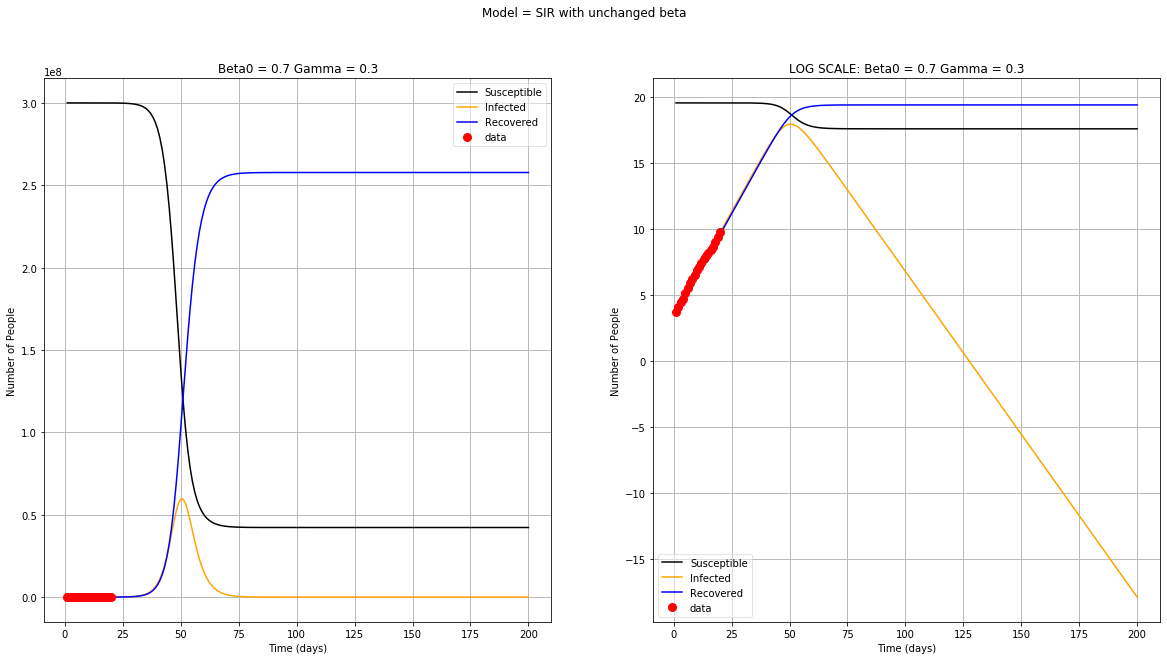

In [28]:
# Complete the code below
# Creates two subplots and unpacks the output array immediately
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))

# first plot not transformation on data
ax1.plot(t, S, 'black', label = 'Susceptible')
ax1.plot(t, I, 'orange', label = 'Infected')
ax1.plot(t, R, 'blue', label = 'Recovered')
ax1.plot(sub_t,Infected[:len(sub_t)],'or',markersize=8,label = 'data')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Number of People')
ax1.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')
ax1.set_title("Beta0 = "+format(beta,'.1f')+" Gamma = "+format(gamma,'.1f'))
legend = ax1.legend()
legend.get_frame().set_alpha(0.5)

# second plot - log of data to show exponential nature of growth
ax2.plot(t, np.log(S), 'black', label = 'Susceptible')
ax2.plot(t, np.log(I), 'orange', label = 'Infected')
ax2.plot(t, np.log(R), 'blue', label = 'Recovered')
ax2.plot(sub_t,np.log(mod_Infected),'or',markersize=8,label = 'data')
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Number of People')
ax2.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')
ax2.set_title("LOG SCALE: Beta0 = "+format(beta,'.1f')+" Gamma = "+format(gamma,'.1f'))
legend = ax2.legend()
legend.get_frame().set_alpha(0.5)

if model == 1:
    fig.suptitle(f'Model = SIR with unchanged beta')
else:
    fig.suptitle(f'Model = SIR with Slowed Beta --- beta drops from {beta:.2f} to {beta*slow:.2f}')

plt.show()

We see in the right log-linear plot that the model seems to fit the values quite well. We can now extract some interesting statistics. One important number is the so-called basic reproduction number (also basic reproduction ratio)  (pronounced “R naught”) which basically shows how many healthy people get infected by a sick person on average:

In [29]:
# summarize some of the statistics
# Your code here to generate the output below
R0 = beta/gamma   
mort = 0.01          # assumed mortality rate

print(f'Model = SIR with unchanged beta')
print("    RO = ",format(R0,'0.2f'))
print("    Start Data = ",model_date)
print("    Days to Peak Infection = ", np.argmax(I))
print("    Remaining days to peak infection = ",np.argmax(I) -len(sub_t))
print("    Peak Infected = ", format(I[np.argmax(I)],",.0f")," or ",format(I[np.argmax(I)]/N,".2%"),"of population")
print("    Deaths at Infection Peak = ",format(I[np.argmax(I)] * mort,',.0f'),"at mortality rate of ",format(mort,".2%"))
print("    Peak Recovered (Immune + Dead) = ", format(R[-1],",.0f"), "or ",format(R[-1]/N,",.0%"),"of population")
print("    Total Deaths = ",format(R[-1] * mort,',.0f'),"at mortality rate of ",format(mort,".2%"))   

Model = SIR with unchanged beta
    RO =  2.18
    Start Data =  2020-03-01
    Days to Peak Infection =  49
    Remaining days to peak infection =  29
    Peak Infected =  59,553,058  or  19.85% of population
    Deaths at Infection Peak =  595,531 at mortality rate of  1.00%
    Peak Recovered (Immune + Dead) =  257,755,894 or  86% of population
    Total Deaths =  2,577,559 at mortality rate of  1.00%


In [30]:
Cases = 500_000
cross_day = (I>Cases).argmax()
print(f'Model = SIR with unchanged beta')
print("    Day at which ",format(Cases,",.0f"),"K infections reached = ",format((I>Cases).argmax()), " or ",
     (cross_day - len(sub_t))," days from now")
print("    Infections = ",format(I[(I>Cases).argmax()],",.0f"))

Model = SIR with unchanged beta
    Day at which  500,000 K infections reached =  30  or  10  days from now
    Infections =  531,075


# Question:   
The US had approximately 950K hospital beds in March.  Would we have enough beds at peak infection assuming 5% of the infected need medical attention? 

In [31]:
# 5% of peak infected <= 950K? 
0.05 * 59_553_058 <= 950_000 # if true, there ARE enough beds at peak infection. 

False

# Answer: 
## We would *not* have enough beds at peak infection assuming 5% of the infected need medical attention. For this scenerio, 2,977,653 beds would be needed, thus there would be a shortage of 2,027,653 beds! 


# Case 2 - Slowed Beta for example b/c of social distancing

In [32]:
# Integrate the diff eqs over the time array using the best fit beta and data for recent data
beta = ropt["x"][0]
gamma = ropt["x"][1]
slow = 0.7           # reduce beta by this factor
model = 2

# code inserted below
if model == 1:
    values = SIR_Integ(y0, t, N, beta, gamma)
else:
    values = SIR_Integ(y0, t, N, beta*slow, gamma)

# assign S, I, R values from values transpose
S, I, R = values.T

Finally, we can plot the arrays using matplotlib:

Notice how reducing beta or the R0 has "flattened" the curve and pushed out the peak in time buying time for hospital capacity to meet the peak.

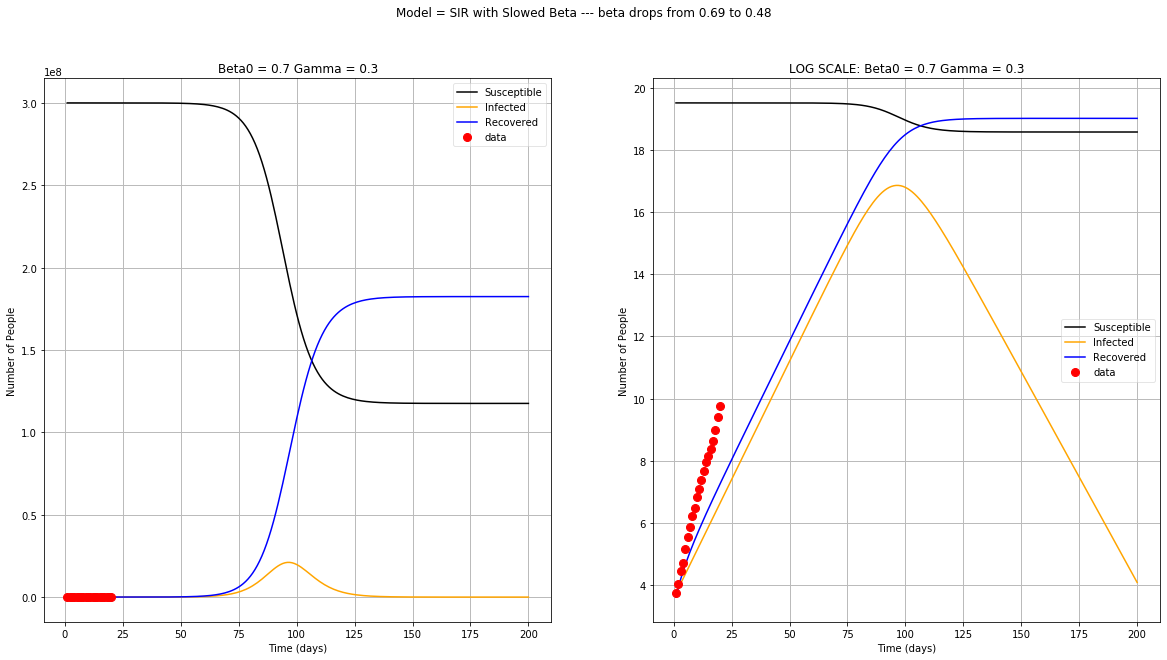

In [33]:
#fig = plt.figure()
# Creates two subplots and unpacks the output array immediately
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))

# first plot no transformation on data
ax1.plot(t, S, 'black', label = 'Susceptible')
ax1.plot(t, I, 'orange', label = 'Infected')
ax1.plot(t, R, 'blue', label = 'Recovered')
ax1.plot(sub_t,Infected[:len(sub_t)],'or',markersize=8,label = 'data')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Number of People')
ax1.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')
ax1.set_title("Beta0 = "+format(beta,'.1f')+" Gamma = "+format(gamma,'.1f'))
legend = ax1.legend()
legend.get_frame().set_alpha(0.5)

# second plot - log of data to show exponential nature of growth
ax2.plot(t, np.log(S), 'black', label = 'Susceptible')
ax2.plot(t, np.log(I), 'orange', label = 'Infected')
ax2.plot(t, np.log(R), 'blue', label = 'Recovered')
ax2.plot(sub_t,np.log(mod_Infected),'or',markersize=8,label = 'data')
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Number of People')
ax2.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')
ax2.set_title("LOG SCALE: Beta0 = "+format(beta,'.1f')+" Gamma = "+format(gamma,'.1f'))
legend = ax2.legend()
legend.get_frame().set_alpha(0.5)

if model == 1:
    fig.suptitle(f'Model = SIR with unchanged beta')
else:
    fig.suptitle(f'Model = SIR with Slowed Beta --- beta drops from {beta:.2f} to {beta*slow:.2f}')

plt.show()

In [34]:
# summarize some of the statistics
# your code here
R0 = beta/gamma   
mort = 0.01   # assumed mortality rate
pk = np.argmax(I)
slow = 0.7
if model == 1:
    print(f'Model = SIR with unchanged beta')
    print("    RO = ",format(R0,'0.2f'))
else:
    print(f'Model = Slowed Beta --- beta drops from {beta:.2f} to {beta*slow:.2f}')
    print("    RO   = ",format(R0,'0.2f'))
    RNEW = beta*slow/gamma 
    print("    RNew = ",format(RNEW,'0.2f'))
print("    Start Data = ",model_date)
print("    Days to Peak Infection = ", pk)
print("    Remaining days to peak infection = ",pk -len(sub_t))
print("    Peak Infected = ", format(I[pk],",.0f")," or ",format(I[pk]/N,".2%"),"of population")
# max deaths with supposed mortality rate
print("    Deaths at Infection Peak = ",format(I[I.argmax()]* mort,',.0f'),"at mortality rate of ",format(mort,".2%"))   
print("    Peak Recoverd (Immune + Dead) = ", format(R[-1],",.0f"), "or ",format(R[-1]/N,",.0%"),"of population")
# max deaths with supposed mortality rate
print("    Total Deaths = ",format(R[-1] * mort,',.0f'),"at mortality rate of ",format(mort,".2%"))

Model = Slowed Beta --- beta drops from 0.69 to 0.48
    RO   =  2.18
    RNew =  1.52
    Start Data =  2020-03-01
    Days to Peak Infection =  95
    Remaining days to peak infection =  75
    Peak Infected =  21,063,497  or  7.02% of population
    Deaths at Infection Peak =  210,635 at mortality rate of  1.00%
    Peak Recoverd (Immune + Dead) =  182,425,617 or  61% of population
    Total Deaths =  1,824,256 at mortality rate of  1.00%
